In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Arrays

In [2]:
a1 = np.array([4,6,8,2])
a2 = np.zeros(10)
a3 = np.ones(4)
a4 = np.random.random(10)
a5 = np.random.randn(10)
a6 = np.linspace(0, 10, 100)
a7 = np.arange(0, 10, 0.02)

# Array Operations

In [3]:
2 * a1

array([ 8, 12, 16,  4])

In [4]:
(1 / a1) + a1 + 1

array([5.25      , 7.16666667, 9.125     , 3.5       ])

In [5]:
x = np.linspace(0, 1, 100)

In [6]:
y = x ** 2

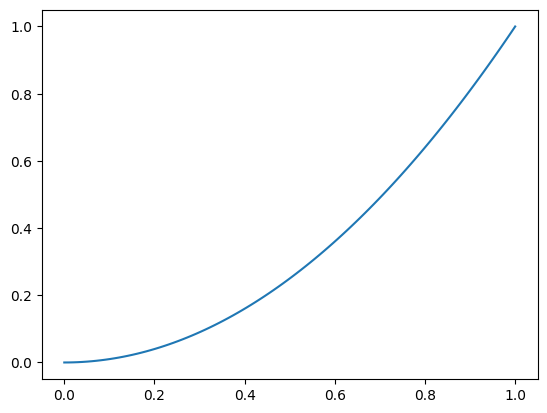

In [7]:
plt.plot(x, y)

(array([1., 0., 1., 0., 1., 1., 3., 0., 2., 1.]),
 array([0.04058014, 0.1361087 , 0.23163726, 0.32716582, 0.42269438,
        0.51822294, 0.6137515 , 0.70928006, 0.80480862, 0.90033718,
        0.99586574]),
 <BarContainer object of 10 artists>)

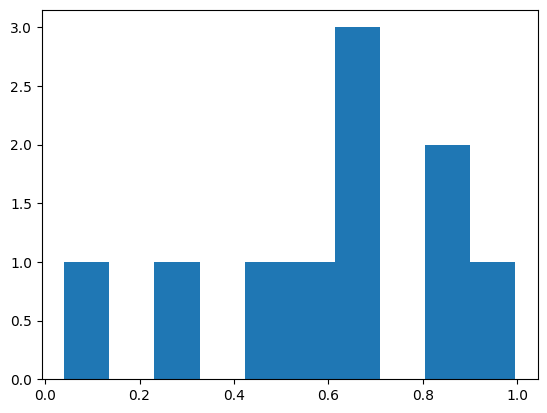

In [8]:
plt.hist(a4)

In [9]:
def f(x):
    return (x ** 2) * (np.sin(x) / np.exp(-x))

x = np.linspace(0, 10, 100)
y = f(x)

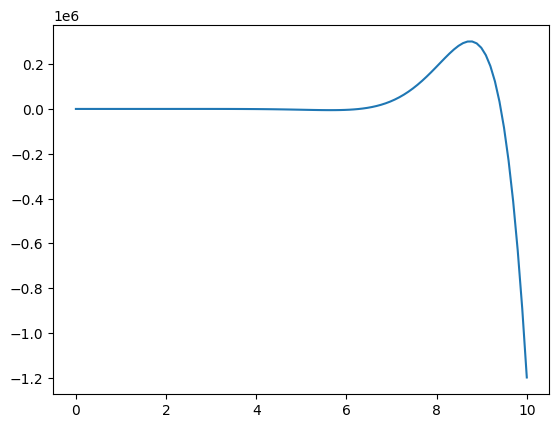

In [10]:
plt.plot(x, y)

List of mathematical functions in NumPy:

https://numpy.org/doc/stable/reference/routines.math.html

# Array Indexing / Slicing

In [11]:
a1 = np.array([2, 4, 6, 8, 10])

In [12]:
a1[2]

np.int64(6)

In [13]:
a1[2:]

array([ 6,  8, 10])

In [14]:
a1[:-2]

array([2, 4, 6])

In [15]:
a1[1:-2]

array([4, 6])

In [16]:
a1[a1 > 3]

array([ 4,  6,  8, 10])

In [17]:
names = np.array(['Jim', 'Luke', 'Josh', 'Pete'])
first_letter_j = np.vectorize(lambda s: s[0])(names) == 'J'
names[first_letter_j]

array(['Jim', 'Josh'], dtype='<U4')

In [18]:
a1

array([ 2,  4,  6,  8, 10])

In [19]:
a1[a1 % 4 == 0]

array([4, 8])

# Calculus / Statistical Functions

In [20]:
a1 = 2 * np.random.randn(10000) + 10

In [21]:
a1

array([ 9.81169292, 10.25690735,  9.86718292, ..., 14.34595267,
       11.03749153, 10.73217232], shape=(10000,))

Mean, standard deviation, and percentiles of arrays:

In [22]:
np.mean(a1)

np.float64(9.986117136265232)

In [23]:
np.std(a1)

np.float64(2.003582019122205)

In [24]:
np.percentile(a1, 80)

np.float64(11.658482789994595)

Integrals and derivatives

In [25]:
x = np.linspace(1, 10, 100)
y = (1 / (x ** 2)) * np.sin(x)
dydx = np.gradient(y, x)
y_integral = np.cumsum(y) * (x[1]-x[0])

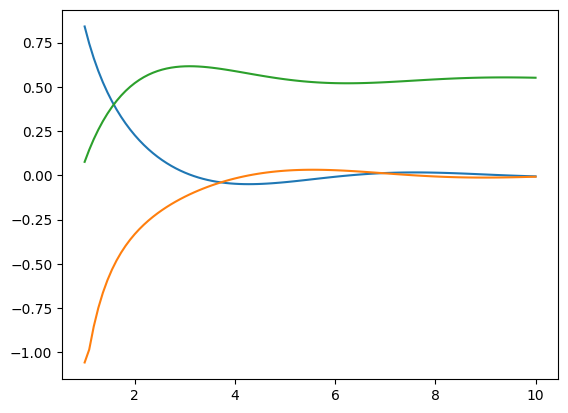

In [26]:
plt.plot(x, y)
plt.plot(x, dydx)
plt.plot(x, y_integral)

# Examples

# Question 1:

Let $y=e^{-x/10} \sin(x)$. Consider 10000 $x$ intervals in the range $[0,10]$

1. Plot the function $y$ vs. $x$ in the range $[0, 10]$. 
2. Compute the mean and standard deviation of $y$ for $x$ values in $[4,7]$
3. For $x$ in the range $[4,7]$, find the value $y_m$ such that 80% of $y$ values are less than $y_m$
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx=0$

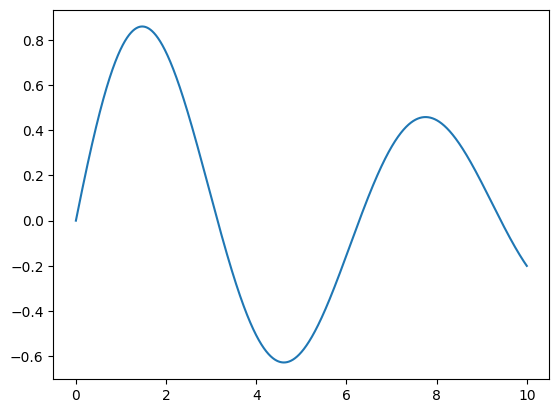

In [27]:
#1

x = np.linspace(0, 10, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

plt.plot(x, y)

In [28]:
#2

x = np.linspace(4, 7, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

print(f'Mean: {np.mean(y)}')
print(f'Standard Deviation: {np.std(y)}')



Mean: -0.29565016986238374
Standard Deviation: 0.3144441774481138


In [29]:
#3

x = np.linspace(4, 7, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

print(f'80% of y values are less than {np.percentile(y, 80)}')


80% of y values are less than 0.06145551155327522


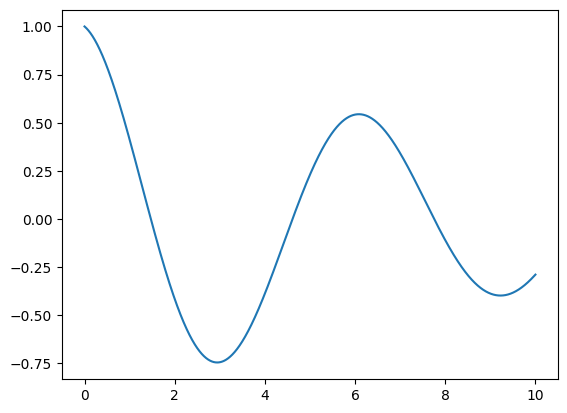

In [30]:
#4

x = np.linspace(0, 10, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

dydx = np.gradient(y, x)

plt.plot(x, dydx)


In [31]:
#5

x = np.linspace(0, 10, 10000)
y = (np.e ** (-x / 10)) * np.sin(x)

dydx = np.gradient(y, x)
zero_value_indices = []

for n in range(np.size(x)):
    if dydx[n - 1] * dydx[n] < 0:
        zero_value_indices.append(n)

zero_value_array = np.array(zero_value_indices)
zero_value_array = x[zero_value_array]
print(zero_value_array[1:])

[1.47114711 4.61346135 7.75477548]


More efficient way of doing #5:

In [32]:
#5

x[1:][dydx[1:] * dydx[:-1] < 0]

array([1.47114711, 4.61346135, 7.75477548])

## Question 2:

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this in one line of code.

In [33]:
nums = np.arange(0, 10001, 1)
nums[(nums % 4 != 0) * (nums % 7 != 0)].sum()

np.int64(32147142)

## Question 3:

Consider the flower petal $r(\theta) = 1+\frac{3}{4}\sin(3 \theta)$ for $0 \leq \theta \leq 2 \pi$

1. Make a plot of the flower (find x and y points)
2. Compute the area using the calculus formula $A = \int_{0}^{2\pi} \frac{1}{2} r^2 d\theta$
3. Compute the arclength using the calculus formula $L = \int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

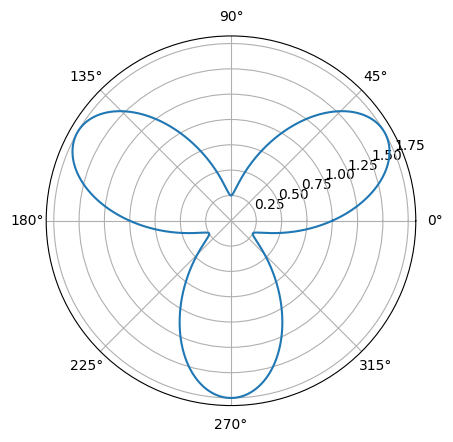

In [39]:
#1

theta_array = np.linspace(0, 2 * np.pi, 100000)
radius_array = 1 + (3 / 4) * (np.sin(3 * theta_array))

plt.polar(theta_array, radius_array)


In [42]:
#2

theta_array = np.linspace(0, 2 * np.pi, 100000)
radius_array = 1 + (3 / 4) * (np.sin(3 * theta_array))

area = sum(((1 /2) * (radius_array ** 2)) * (theta_array[1] - theta_array[0]))
print(f'Area = {area}')


Area = 4.02519700365261


In [44]:
#3

theta_array = np.linspace(0, 2 * np.pi, 100000)
radius_array = 1 + (3 / 4) * (np.sin(3 * theta_array))

drdtheta = np.gradient(radius_array, theta_array)
arc_length = sum(np.sqrt((radius_array ** 2) + (drdtheta ** 2)) * (theta_array[1] - theta_array[0]))
print(f'Arc Length = {arc_length}')

Arc Length = 11.625143180659796


## Question 4:

The power emitted by a blackbody is $P = A \sigma \epsilon T^4$. After measuring the temperature of a star you find that $T(t) = T_0 \frac{1}{1+e^{-kt}}$. Plot the total energy emitted by the star as a function of time using the fact that $E(t) = \int_{t'=0}^{t'=t} P(t') dt' $